## 1. Exploratory Data Analysis


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
dataset = pd.read_csv('forestfires.csv')

In [ ]:
dataset

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [ ]:
# Setting the seed
seed_value = 42
np.random.seed(seed_value)

In [ ]:
# Prediction whether the fire is significant
dataset["significant"] = np.where(dataset["area"] > 6.0, 1, 0)
dataset

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,significant
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,1
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,1
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,1
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0


In [ ]:
dataset.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,significant
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.268859
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.443796
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,1.000000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000


In [ ]:
# sns.pairplot(dataset)

<ipython-input-8-915b61441cde>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True, fmt='.2f', ax=ax)


<Axes: >

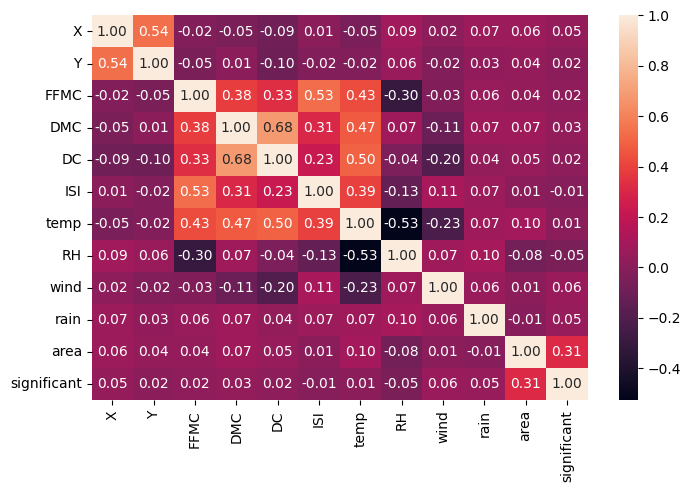

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(dataset.corr(), annot=True, fmt='.2f', ax=ax)

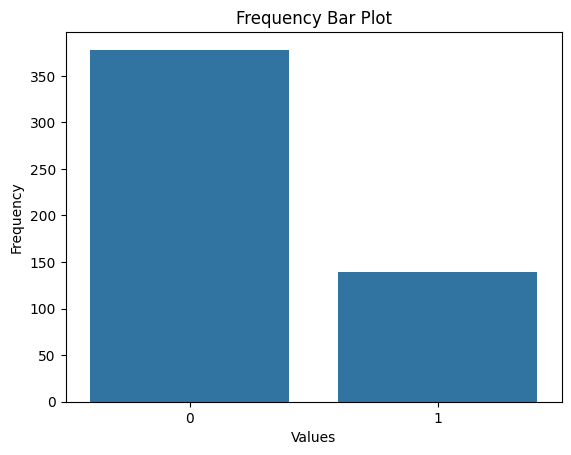

In [ ]:
# Checking class imbalance
sns.countplot(x='significant', data=dataset)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Frequency Bar Plot')
plt.show()

In [ ]:
series = pd.Series(dataset["significant"])
frequency_table = series.value_counts().sort_index()
print(frequency_table)

0    378
1    139
Name: significant, dtype: int64


In [ ]:
# Addressing Class Imbalance
from sklearn.utils import resample
majority_class = dataset[dataset['significant'] == 0]
minority_class = dataset[dataset['significant'] == 1]

# Downsample the majority class
num_samples=len(minority_class)
downsampled_majority = resample(majority_class, replace=False, n_samples=int(num_samples), random_state=42)

# Combine the downsampled majority class with the minority class
downsampled_data = pd.concat([downsampled_majority, minority_class])

# Display the downsampled dataset
print(downsampled_data)

     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  \
387  5  5   mar  thu  90.9   18.9   30.6   8.0  11.6  48   5.4   0.0   0.00   
445  5  5   aug  sun  94.0   47.9  100.7  10.7  17.3  80   4.5   0.0   0.00   
437  8  6   aug  sat  89.4  253.6  768.4   9.7  14.2  73   2.7   0.0   0.00   
145  6  5   aug  thu  95.2  131.7  578.8  10.4  27.4  22   4.0   0.0   0.90   
55   4  3   sep  thu  92.9  137.0  706.4   9.2  27.7  24   2.2   0.0   0.00   
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...   
499  7  5   aug  tue  96.1  181.1  671.2  14.3  27.3  63   4.9   6.4  10.82   
504  4  3   aug  wed  94.5  139.4  689.1  20.0  28.9  29   4.9   0.0  49.59   
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44   
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29   
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16   

     significant  
387            0  
445          

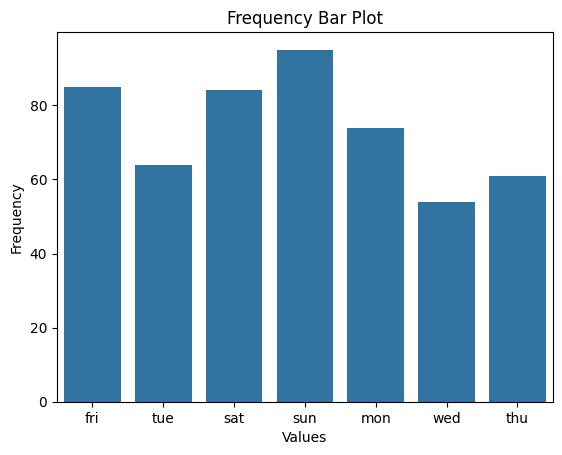

In [ ]:
sns.countplot(x='day', data=dataset)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Frequency Bar Plot')
plt.show()

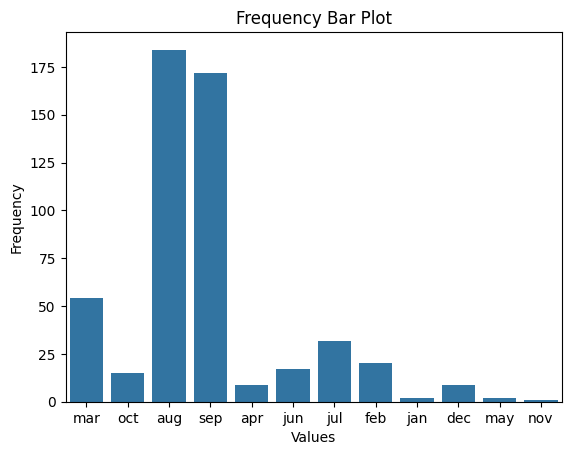

In [ ]:
sns.countplot(x='month', data=dataset)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Frequency Bar Plot')
plt.show()

In [ ]:
#dataset = downsampled_data
dataset["day"] = dataset["day"].apply(lambda x: 1 if (x == "sun" or x == "sat") else 0)
dataset = dataset.rename(columns = {'day' : 'weekend'})

Text(0.5, 1.0, 'Count plot of weekend vs weekday')

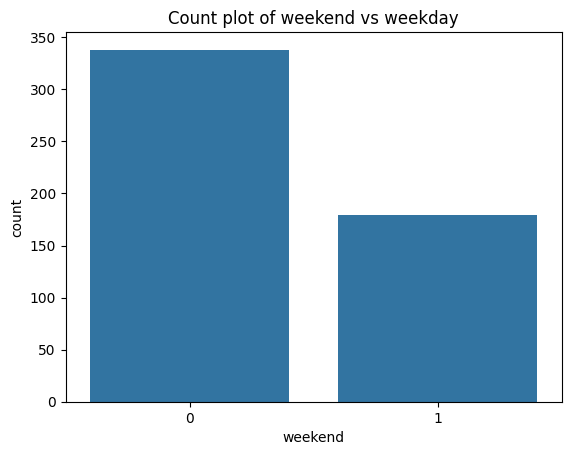

In [ ]:
sns.countplot(x='weekend', data=dataset)
plt.title('Count plot of weekend vs weekday')

In [ ]:
dataset["weekend"]

0      0
1      0
2      1
3      0
4      1
      ..
512    1
513    1
514    1
515    1
516    0
Name: weekend, Length: 517, dtype: int64

In [ ]:
dataset.describe()

,X,Y,weekend,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,significant
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,0.346228,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.268859
std,2.313778,1.229900,0.476228,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.443796
min,1.000000,2.000000,0.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,0.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,0.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000
75%,7.000000,5.000000,1.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,1.000000
max,9.000000,9.000000,1.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000


In [ ]:
# Checking missing values
dataset.isnull().any()

X              False
Y              False
month          False
weekend        False
FFMC           False
DMC            False
DC             False
ISI            False
temp           False
RH             False
wind           False
rain           False
area           False
significant    False
dtype: bool

In [ ]:
# CHecking skewness of dataset
dataset.skew()

<ipython-input-19-8035be43cde7>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.skew()


X               0.036246
Y               0.417296
weekend         0.648299
FFMC           -6.575606
DMC             0.547498
DC             -1.100445
ISI             2.536325
temp           -0.331172
RH              0.862904
wind            0.571001
rain           19.816344
area           12.846934
significant     1.045701
dtype: float64

In [ ]:
zero_rain = (dataset["rain"] == 0).sum()
non_zero_rain = (dataset["rain"] != 0).sum()
print(f"Column: Zero Count = {zero_rain}, Non-Zero Count = {non_zero_rain}")

Column: Zero Count = 509, Non-Zero Count = 8


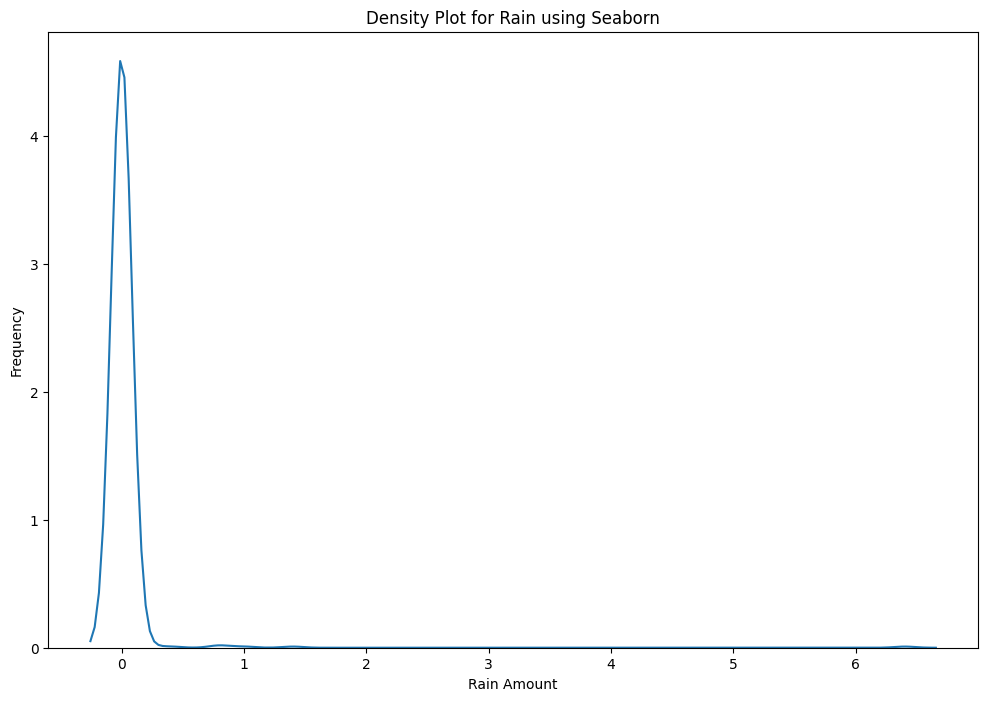

In [ ]:
plt.figure(figsize=(12, 8))
sns.kdeplot(data=dataset, x="rain")
plt.title('Density Plot for Rain using Seaborn')
plt.xlabel('Rain Amount')
plt.ylabel('Frequency')
plt.show()

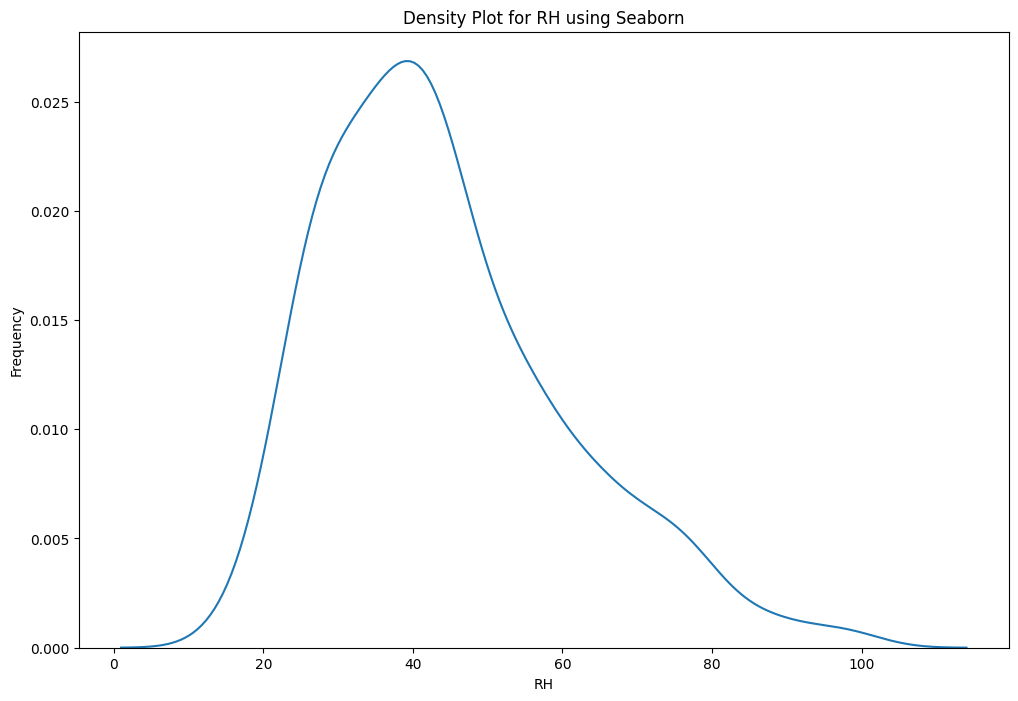

In [ ]:
plt.figure(figsize=(12, 8))
sns.kdeplot(data=dataset, x="RH")
plt.title('Density Plot for RH using Seaborn')
plt.xlabel('RH')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Apply log transformation to RH and Rain Column
dataset.loc[:, ['rain', 'area']] = dataset.loc[:, ['rain', 'area']].apply(lambda x: np.log(x + 1), axis = 1)

In [ ]:
dataset.skew()

<ipython-input-24-8035be43cde7>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.skew()


X               0.036246
Y               0.417296
weekend         0.648299
FFMC           -6.575606
DMC             0.547498
DC             -1.100445
ISI             2.536325
temp           -0.331172
RH              0.862904
wind            0.571001
rain           14.173028
area            1.217838
significant     1.045701
dtype: float64

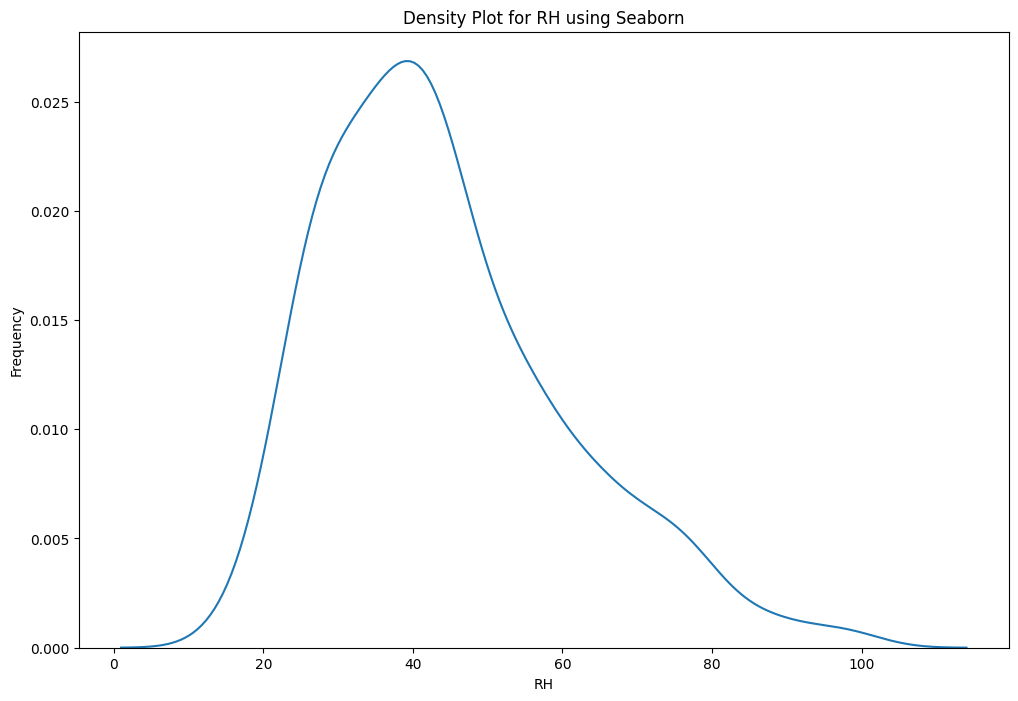

In [ ]:
plt.figure(figsize=(12, 8))
sns.kdeplot(data=dataset, x="RH")
plt.title('Density Plot for RH using Seaborn')
plt.xlabel('RH')
plt.ylabel('Frequency')
plt.show()

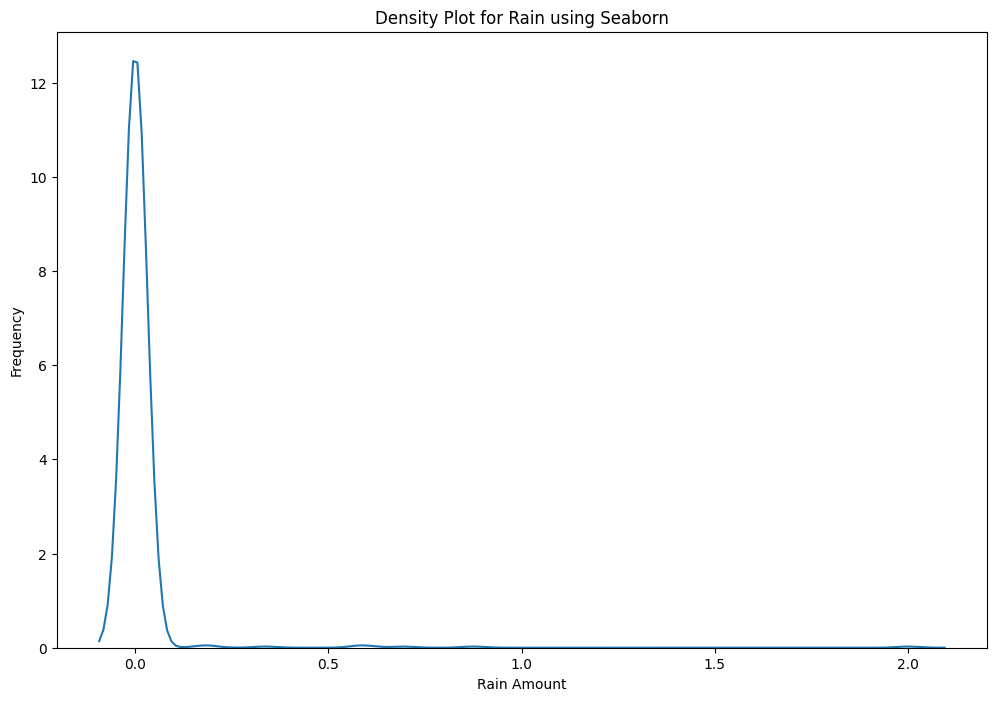

In [ ]:
plt.figure(figsize=(12, 8))
sns.kdeplot(data=dataset, x="rain")
plt.title('Density Plot for Rain using Seaborn')
plt.xlabel('Rain Amount')
plt.ylabel('Frequency')
plt.show()

## 3. Data Preprocessing



In [ ]:
dataset

,X,Y,month,weekend,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,significant
0,7,5,mar,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.000000,0.000000,0
1,7,4,oct,0,90.6,35.4,669.1,6.7,18.0,33,0.9,0.000000,0.000000,0
2,7,4,oct,1,90.6,43.7,686.9,6.7,14.6,33,1.3,0.000000,0.000000,0
3,8,6,mar,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.182322,0.000000,0
4,8,6,mar,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,1,81.6,56.7,665.6,1.9,27.8,32,2.7,0.000000,2.006871,1
513,2,4,aug,1,81.6,56.7,665.6,1.9,21.9,71,5.8,0.000000,4.012592,1
514,7,4,aug,1,81.6,56.7,665.6,1.9,21.2,70,6.7,0.000000,2.498152,1
515,1,4,aug,1,94.4,146.0,614.7,11.3,25.6,42,4.0,0.000000,0.000000,0


In [ ]:
X = dataset.iloc[:, 0:12].values
y = dataset.iloc[:, 13]

In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
512    1
513    1
514    1
515    0
516    0
Name: significant, Length: 517, dtype: int64

## Encoding Categorical Variable

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# First - Type of Transformation, Second - Type of Encoding, Third - Index of Column To Encode
# Remainder - To keep other columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

## Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
print(X_train)

[[0.0 1.0 0.0 ... 52 5.8 0.0]
 [0.0 0.0 0.0 ... 19 1.3 0.0]
 [0.0 1.0 0.0 ... 36 3.1 0.0]
 ...
 [0.0 0.0 0.0 ... 25 6.3 0.0]
 [0.0 1.0 0.0 ... 41 5.8 0.0]
 [0.0 0.0 0.0 ... 60 5.4 0.0]]


In [ ]:
print(X_test)

[[0.0 1.0 0.0 ... 56 3.1 0.0]
 [0.0 1.0 0.0 ... 59 5.8 0.0]
 [0.0 0.0 0.0 ... 42 3.1 0.0]
 ...
 [0.0 0.0 0.0 ... 39 2.7 0.0]
 [0.0 1.0 0.0 ... 32 6.3 0.0]
 [0.0 0.0 0.0 ... 64 3.1 0.0]]


In [ ]:
print(y_train)

135    0
218    1
119    0
463    0
42     0
      ..
129    0
144    0
72     0
235    1
37     0
Name: significant, Length: 413, dtype: int64


In [ ]:
print(y_test)

270    0
90     0
133    0
221    1
224    1
      ..
438    1
11     0
358    0
92     0
362    0
Name: significant, Length: 104, dtype: int64


In [ ]:
y_train = np.array(y_train)
y_train

y_test = np.array(y_test)
y_test

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
y_train = y_train.reshape(len(y_train),1)
y_train

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

## Modelling of Machine Learning Model


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, y_train,  validation_data = (X_test, y_test), batch_size = 20, epochs = 100)

Epoch 1/100
21/21 [==============================] - 1s 15ms/step - loss: 0.7345 - accuracy: 0.4528 - val_loss: 0.7118 - val_accuracy: 0.5577
Epoch 2/100
21/21 [==============================] - 0s 5ms/step - loss: 0.7051 - accuracy: 0.5545 - val_loss: 0.6953 - val_accuracy: 0.5385
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6788 - accuracy: 0.6320 - val_loss: 0.6823 - val_accuracy: 0.6635
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6568 - accuracy: 0.6949 - val_loss: 0.6710 - val_accuracy: 0.7019
Epoch 5/100
21/21 [==============================] - 0s 5ms/step - loss: 0.6361 - accuracy: 0.7143 - val_loss: 0.6622 - val_accuracy: 0.6827
Epoch 6/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6181 - accuracy: 0.7288 - val_loss: 0.6568 - val_accuracy: 0.6827
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6036 - accuracy: 0.7337 - val_loss: 0.6518 - val_accuracy: 0.7019
Epoch 8/100


In [ ]:
y_pred = ann.predict(sc_x.transform(X_test))
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

4/4 [==============================] - 0s 3ms/step
[[0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[75  0]
 [29  0]]


0.7211538461538461